#TTCD without Transformer: Sea Ice Dataset (Ablation Study)


Here we implemented a simple convolution block and de-stationary factor block to learn non-stationary features and then the Causal Structure learner module is applied to learned features. The convolution and de-stationary factor blocks together work as Non-Staionary Feature Learner module.

In this notebook, we applied the ablation model to the real world Sea Ice dataset to generate a causal graph. The codes to visualize the predicted causal graph are available after the model training codes. The predicted graph is compared with ground truth using an adjacency matrix (array).  

##Read Dataset

In [1]:
import numpy as np
import pandas as pd


df_2D_data_sea_ice = pd.read_csv('/content/Arctic_Sea_Ice_Data_1980_2018.csv')
df_2D_data_sea_ice.columns = ['HFLX','SW','LW','SLP', 'PRE','RH','U10m', 'V10m', 'ICE', 'CC', 'CW','GH']
df_2D_data_sea_ice = df_2D_data_sea_ice[['HFLX','CC','SW','U10m','SLP', 'PRE','ICE', 'LW','V10m','CW','GH','RH']]

In [37]:
true_graph = np.zeros((12,12))
true_graph[0,5]=1
true_graph[0,6]=1
true_graph[0,9]=1
true_graph[0,1]=1
true_graph[0,4]=1
true_graph[0,3]=1
true_graph[0,8]=1

true_graph[1,2]=1
true_graph[1,7]=1
true_graph[1,11]=1
true_graph[1,0]=1

true_graph[2,6]=1

true_graph[3,6]=1
true_graph[3,0]=1

true_graph[4,3]=1
true_graph[4,8]=1
true_graph[4,0]=1
true_graph[4,6]=1
true_graph[4,10]=1
true_graph[4,11]=1

true_graph[5,9]=1
true_graph[5,1]=1
true_graph[5,6]=1
true_graph[5,11]=1
true_graph[5,0]=1

true_graph[6,0]=1
true_graph[6,2]=1
true_graph[6,7]=1
true_graph[6,4]=1
true_graph[6,3]=1
true_graph[6,8]=1

true_graph[7,6]=1

true_graph[8,0]=1
true_graph[8,6]=1

true_graph[9,0]=1
true_graph[9,2]=1
true_graph[9,7]=1
true_graph[9,11]=1
true_graph[9,5]=1

true_graph[10,11]=1
true_graph[10,4]=1
true_graph[10,7]=1

true_graph[11,5]=1
true_graph[11,7]=1
true_graph[11,1]=1
true_graph[11,9]=1

true_graph

array([[0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.]])

In [35]:
!pip install cdt

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.1/921.1 kB 44.5 MB/s eta 0:00:00
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7392 sha256=e22a98483548732467d796b7b64f9ed243f042c2adb7727465773110144a2602
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29256 sha256=084b78d1e4e65f0944bc8b69c267af5edc55b5254e68c223670c43c1abd2fe56
  Stored in directory: /root/.cache/pip/wheels/dd/67/40/683074a684607162bd0e34dcf7ccdfcab5861c3b2a83286f3a
Successfully built GPUtil skrebate


In [36]:
import cdt

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


##Data Pre-processing

In [2]:
syn_data_np = df_2D_data_sea_ice.to_numpy()

In [3]:
syn_data_np_T= syn_data_np.T

In [4]:
syn_data_np_T.shape

(12, 468)

In [5]:
syn_data_pro = np.zeros((syn_data_np.shape[0]-12,12,13))
for i in range(0, (syn_data_np.shape[0]-12)):
  syn_data_pro[i,:,:]= syn_data_np_T[0:12, i:i+13]


In [6]:
syn_data_pro[0,:,:], syn_data_np_T[0:4,0:6]

(array([[-1.45157464e+01, -1.11553853e+01, -1.58244419e+01,
         -2.41162185e+01, -3.12300767e+01, -4.26352820e+01,
         -4.13351722e+01, -3.35899991e+01, -2.44832295e+01,
         -2.24431200e+01, -2.22250324e+01, -2.12691981e+01,
         -1.95308288e+01],
        [ 8.45433429e+01,  8.31670012e+01,  8.14901860e+01,
          7.92846924e+01,  8.04202870e+01,  7.45023805e+01,
          7.99720333e+01,  7.80389609e+01,  8.07647641e+01,
          8.39811816e+01,  8.38233271e+01,  8.30704243e+01,
          8.64599774e+01],
        [ 3.39713388e+00,  1.89539705e+01,  7.18698765e+01,
          1.59062774e+02,  2.25084615e+02,  2.48960398e+02,
          1.96112741e+02,  1.38105518e+02,  7.24958246e+01,
          2.50947999e+01,  5.49039306e+00,  1.34991112e+00,
          3.26684625e+00],
        [-3.09647671e-01,  7.17917742e-01, -2.18005099e-01,
         -1.88627425e-01, -1.03864757e+00,  2.09584029e-01,
         -4.53901575e-01,  4.00440404e-01,  2.95046745e-01,
         -4.6088494

In [7]:
syn_data_2d = np.expand_dims(syn_data_pro, axis =-1)
syn_data_2d.shape

(456, 12, 13, 1)

In [8]:
syn_data_2d_tf = syn_data_2d.transpose(0, 3, 1, 2) #for pytorch
syn_data_2d_tf.shape

(456, 1, 12, 13)

In [9]:
syn_data_np_4 = syn_data_np[:,0:12]
syn_data_np_4.shape

(468, 12)

In [10]:
syn_data_4_df =pd.DataFrame(data = syn_data_np_4,
                  columns = df_2D_data_sea_ice.columns)

In [11]:
syn_data_4_df.iloc[:5,:]

,HFLX,CC,SW,U10m,SLP,PRE,ICE,LW,V10m,CW,GH,RH
0,-14.515746,84.543343,3.397134,-0.309648,1019.807404,0.858821,15053607.0,188.566474,-0.308690,39.070621,5880.449752,72.950740
1,-11.155385,83.167001,18.953971,0.717918,1013.952864,0.831777,16074814.0,194.381967,0.132610,39.984280,5861.477613,73.521670
2,-15.824442,81.490186,71.869876,-0.218005,1018.900662,0.669739,16207072.0,197.269891,-0.229795,34.143657,5912.337135,74.499365
3,-24.116219,79.284692,159.062774,-0.188627,1016.864319,0.776846,15546525.0,216.452459,-0.334186,41.757531,5984.780309,71.982550
4,-31.230077,80.420287,225.084615,-1.038648,1017.970033,0.840839,14080852.0,260.700879,-0.611375,63.752542,6128.435629,68.851454


##TTCD Model Without Transformer

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time
from torchsummary import summary

# Set random seed for reproducibility
torch.manual_seed(1001)

# Custom Causal Conv2D Layer
class CausalConv2D(nn.Module):
    def __init__(self, in_channels, out_channels, counter, kernel_size=(1, 1), padding='valid', activation="tanh"):
        super(CausalConv2D, self).__init__()
        self.conv2d = nn.Conv2d(in_channels, out_channels, kernel_size, padding=0 if padding == 'valid' else 1)
        self.counter = counter
        self.mask = None
        self.activation = nn.Tanh() if activation == "tanh" else nn.ReLU()

    def forward(self, x):
        if self.mask is None:
            self.mask = torch.ones_like(self.conv2d.weight)
            self.mask[0,0,self.counter, -1] = 0.0
        self.conv2d.weight.data.mul_(self.mask)
        return self.activation(self.conv2d(x))

In [16]:
class DSFactors(nn.Module):
    '''
    MLP to learn the De-stationary factors
    '''
    def __init__(self, enc_in, seq_len, hidden_dims, hidden_layers, output_dim, kernel_size=3):
        super(DSFactors, self).__init__()

        padding = 1 if torch.__version__ >= '1.5.0' else 2
        self.series_conv = nn.Conv1d(in_channels=seq_len, out_channels=1, kernel_size=kernel_size, padding=padding, padding_mode='circular', bias=False)


        layers = [nn.Linear(2 * enc_in, hidden_dims[0]), nn.ReLU()]
        for i in range(hidden_layers-1):
            layers += [nn.Linear(hidden_dims[i], hidden_dims[i+1]), nn.ReLU()]

        layers += [nn.Linear(hidden_dims[-1], output_dim, bias=False)]
        self.backbone = nn.Sequential(*layers)

    def forward(self, x, stats):
        # x:     B x S x E
        # stats: B x 1 x E
        # y:     B x O
        batch_size = x.shape[0]
        x = self.series_conv(x)          # B x 1 x E
        x = torch.cat([x, stats], dim=1) # B x 2 x E
        x = x.view(batch_size, -1) # B x 2E
        y = self.backbone(x)       # B x O

        return y

In [17]:
# Causal Structure Learner Definition
class CausalModel2D(nn.Module):
    def __init__(self, input_dims):
        super(CausalModel2D, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=input_dims[0], out_channels=4, kernel_size=1)
        self.activation = nn.Tanh() #nn.ReLU()

        self.pooled_outputs = nn.ModuleList([CausalConv2D(1, 1, i, kernel_size=(12, 13), activation="tanh") for i in range(12)])
        self.tau_learner   = DSFactors(enc_in=12, seq_len=13, hidden_dims=[64, 64], hidden_layers=2, output_dim=1)
        self.delta_learner = DSFactors(enc_in=12, seq_len=13, hidden_dims=[64, 64], hidden_layers=2, output_dim=13)



    def forward(self, x):
        x_raw = x.clone().detach()

        # Normalization
        mean_x = x.mean(3, keepdim=True).detach() # B x 1 x E x 1
        print("X mean size: ",mean_x.size())
        x = x - mean_x
        std_x = torch.sqrt(torch.var(x, dim=3, keepdim=True, unbiased=False) + 1e-5).detach() # B x 1 x E x 1
        print("X std size: ",std_x.size())
        x = x / std_x

        y = x.clone().detach()
        y = y[:,0,:,12].view(y.size(0), -1)
        print("Y std size: ", y.size())

        tau = self.tau_learner(x_raw.squeeze(1).permute(0, 2, 1), std_x.squeeze(3)).exp()     # B x S x E, B x 1 x E -> B x 1, positive scalar
        delta = self.delta_learner(x_raw.squeeze(1).permute(0, 2, 1), mean_x.squeeze(3))      # B x S x E, B x 1 x E -> B x S

        tau = tau.unsqueeze(1).unsqueeze(1)  # B x 1 x 1 x 1
        delta = delta.unsqueeze(1).unsqueeze(1)  # B x 1 x 1 x S

        x = self.conv1(x)
        x = self.activation(x) #1st
        x = torch.mean(x, dim=1, keepdim=True)
        #x = self.reshape(x)

        x = x * tau + delta

        pooled_outputs = [layer(x) for layer in self.pooled_outputs]
        x = torch.cat(pooled_outputs, dim=1)
        x = x.view(x.size(0), -1)

        return x, y


In [18]:
# Overall TTCD Model Definition
class TTCDModel(nn.Module):
    def __init__(self, dims, alpha=1.0, rho=1.0, rho_max=10e20, h_tol=1e-8):
        super(TTCDModel, self).__init__()
        self.dims = dims
        self.alpha = alpha
        self.rho = rho
        self.h_p = float('inf')
        self.rho_max = rho_max
        self.h_tol = h_tol
        self.model_2d = CausalModel2D(self.dims)

    def forward(self, x):
        return self.model_2d(x)

    def custom_loss_function(self, y_true, y_pred):

        # Count NaNs
        #nan_count = torch.sum(torch.isnan(y_pred)).item()
        #nan_count1 = torch.sum(torch.isnan(y_true)).item()
        #print(f"Number of NaNs: {nan_count1, nan_count1}")
        #print("the difference is: ",torch.sum(torch.sub(y_true, y_pred)))

        mse = nn.MSELoss()(y_pred, y_true)
        print("MSE sizes Ypred, YTrue: ", y_pred.size(), y_true.size())
        h_val = self.causal_loss_h()
        h_loss = 0.5 * self.rho * h_val * h_val + self.alpha * h_val
        lambda1 = 0.9
        adj_mat = self.get_mat()
        sparse_loss = lambda1 * np.sum(np.absolute(adj_mat))
        print(f'MSE Loss is: {mse}, h Loss is: {h_loss}, L1 loss: {sparse_loss}, Total Loss is: {mse + h_loss + sparse_loss}')
        return mse + h_loss + sparse_loss

    def causal_loss_h(self):
        mat = self.get_mat()
        h_val = self.h_acy(mat[:, 144:])
        return h_val

    def get_mat(self):
        # Assuming `self.model_2d` has 4 causal conv layers
        conv_layers = [layer for layer in self.model_2d.pooled_outputs]
        weights = [layer.conv2d.weight.data.cpu().numpy().flatten('F') for layer in conv_layers]
        mat_2d_s = np.stack(weights)
        return mat_2d_s

    def h_acy(self, A):
        n_var = A.shape[0]
        #x_np = torch.from_numpy(np_array)
        AT = torch.tensor(A, dtype=torch.float32)
        h = torch.trace(torch.linalg.matrix_exp(AT * AT)) - n_var
        return h

    def compile(self, optimizer='adam'):
        self.optimizer = optim.Adam(self.parameters(), lr=1e-2) if optimizer == 'adam' else optim.SGD(self.parameters(), lr=1e-2)

    def fit(self, x, y, maxiter=100, batch_size=512, save_dir='./results/temp'):
        start_time = time.time()

        # Logging
        log_file = open(f"{save_dir}/causalnn_log.csv", 'w')
        log_file.write('iter,loss\n')

        train_loader = torch.utils.data.DataLoader(list(zip(x, y)), batch_size=batch_size, shuffle=False)
        h_n = None

        for epoch in range(maxiter):
            print(f'Epoch: {epoch}')
            #h_n = None
            for i, (x_batch, y_batch) in enumerate(train_loader):
                x_batch = torch.tensor(x_batch, dtype=torch.float32)
                y_batch = torch.tensor(y_batch, dtype=torch.float32)


                self.optimizer.zero_grad()
                output, y = self.forward(x_batch)
                #loss = self.custom_loss_function(y_batch, output)
                loss = self.custom_loss_function(y, output)
                loss.backward()
                self.optimizer.step()


        log_file.close()
        torch.save(self.state_dict(), f"{save_dir}/TTCD_model_final_{round(time.time())}.pt")

        x_all = torch.tensor(x, dtype=torch.float32)
        y_pred, _ = self.forward(x_all)
        y_pred = y_pred.detach().cpu().numpy()
        adj_mat = self.get_mat()

        return y_pred, adj_mat




##Training the Ablation Model

In [12]:
syn_data_np_4.shape, syn_data_2d_tf.shape

((468, 12), (456, 1, 12, 13))

In [13]:
np.count_nonzero(np.isnan(syn_data_2d_tf))

0

In [14]:
data_y_syn = syn_data_np_4[12:,:]
data_y_syn.shape

(456, 12)

In [20]:
# `syn_data_2d` and `data_y_syn` is dataset
torch.manual_seed(1001)
ttcdmodel = TTCDModel(dims=syn_data_2d_tf.shape[1:])
ttcdmodel.compile(optimizer='SGD')
summary(ttcdmodel, syn_data_2d_tf.shape[1:])


X mean size:  torch.Size([2, 1, 12, 1])
X std size:  torch.Size([2, 1, 12, 1])
Y std size:  torch.Size([2, 12])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1                [-1, 1, 12]              39
            Linear-2                   [-1, 64]           1,600
              ReLU-3                   [-1, 64]               0
            Linear-4                   [-1, 64]           4,160
              ReLU-5                   [-1, 64]               0
            Linear-6                    [-1, 1]              64
         Projector-7                    [-1, 1]               0
            Conv1d-8                [-1, 1, 12]              39
            Linear-9                   [-1, 64]           1,600
             ReLU-10                   [-1, 64]               0
           Linear-11                   [-1, 64]           4,160
             ReLU-12                   [-1, 64]        

In [21]:
y_pred, mat = ttcdmodel.fit(x=syn_data_2d_tf, y=data_y_syn, maxiter=500, batch_size=64, save_dir='/content/')

Epoch: 0
X mean size:  torch.Size([64, 1, 12, 1])
X std size:  torch.Size([64, 1, 12, 1])
Y std size:  torch.Size([64, 12])
MSE sizes Ypred, YTrue:  torch.Size([64, 12]) torch.Size([64, 12])
MSE Loss is: 1.9628444910049438, h Loss is: 0.00028041956829838455, L1 loss: 66.63264312744141, Total Loss is: 68.59577178955078
New h_val is: 0.0002803802490234375
X mean size:  torch.Size([64, 1, 12, 1])
X std size:  torch.Size([64, 1, 12, 1])
Y std size:  torch.Size([64, 12])
MSE sizes Ypred, YTrue:  torch.Size([64, 12]) torch.Size([64, 12])
MSE Loss is: 1.8777965307235718, h Loss is: 0.00028041956829838455, L1 loss: 66.63264312744141, Total Loss is: 68.5107192993164
New h_val is: 0.0002803802490234375
X mean size:  torch.Size([64, 1, 12, 1])
X std size:  torch.Size([64, 1, 12, 1])
Y std size:  torch.Size([64, 12])
MSE sizes Ypred, YTrue:  torch.Size([64, 12]) torch.Size([64, 12])
MSE Loss is: 1.927947998046875, h Loss is: 0.00028041956829838455, L1 loss: 66.63264312744141, Total Loss is: 68.560

<ipython-input-18-b65aac9b6ca6>:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_batch = torch.tensor(x_batch, dtype=torch.float32)
<ipython-input-18-b65aac9b6ca6>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_batch = torch.tensor(y_batch, dtype=torch.float32)


Streaming output truncated to the last 5000 lines.
X mean size:  torch.Size([64, 1, 12, 1])
X std size:  torch.Size([64, 1, 12, 1])
Y std size:  torch.Size([64, 12])
MSE sizes Ypred, YTrue:  torch.Size([64, 12]) torch.Size([64, 12])
MSE Loss is: 1.9660156965255737, h Loss is: 0.00028041956829838455, L1 loss: 66.64595031738281, Total Loss is: 68.61224365234375
New h_val is: 0.0002803802490234375
X mean size:  torch.Size([64, 1, 12, 1])
X std size:  torch.Size([64, 1, 12, 1])
Y std size:  torch.Size([64, 12])
MSE sizes Ypred, YTrue:  torch.Size([64, 12]) torch.Size([64, 12])
MSE Loss is: 1.8835538625717163, h Loss is: 0.00028041956829838455, L1 loss: 66.64595031738281, Total Loss is: 68.52978515625
New h_val is: 0.0002803802490234375
X mean size:  torch.Size([64, 1, 12, 1])
X std size:  torch.Size([64, 1, 12, 1])
Y std size:  torch.Size([64, 12])
MSE sizes Ypred, YTrue:  torch.Size([64, 12]) torch.Size([64, 12])
MSE Loss is: 1.9178434610366821, h Loss is: 0.00028041956829838455, L1 loss:

##Causal Graph

In [23]:
matrix_2d_2d_s = mat

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
G_2d_s1 = nx.DiGraph()

nodes_2d_s = ['HFLX', 'CC', 'SW', 'U10m', 'SLP', 'PRE', 'ICE', 'LW', 'V10m', 'CW','GH', 'RH']
nodes_r_2d_s = ['HFLX', 'CC', 'SW', 'U10m', 'SLP', 'PRE', 'ICE', 'LW', 'V10m', 'CW','GH', 'RH']
edges_2d_s1 = []
pred_graph_s1 = np.zeros((12,12))

In [26]:
for i in range (0, 12):
  G_2d_s1.add_node(nodes_2d_s[i],pos=(int(i/3)+1,(i%3)+1))

In [27]:
count=0
for i in range(0, 156):
  for j in range (0, 12):
    if matrix_2d_2d_s[j,i] > 0.075:
      col = np.round(matrix_2d_2d_s[j,i], 2)
      print(i,j, matrix_2d_2d_s[j,i])
      G_2d_s1.add_edge(nodes_2d_s[i%12], nodes_r_2d_s[j], weight=col)
      pred_graph_s1[i%12, j]=1
      count+=1


3 0 0.07626408
3 10 0.07536179
11 2 0.076974005
13 4 0.07691226
15 2 0.07574886
16 6 0.077348314
18 6 0.07672677
18 10 0.07648009
21 10 0.07789351
23 5 0.08004254
24 10 0.07916231
26 8 0.075234815
28 8 0.07792334
30 8 0.079577774
35 4 0.07756922
37 0 0.07568553
40 8 0.07741961
43 9 0.0797762
46 0 0.07762461
48 1 0.07744807
54 10 0.07659944
55 5 0.07726939
55 11 0.0798221
58 8 0.07652105
59 6 0.075992756
59 9 0.079185955
63 6 0.07952078
66 7 0.07657039
68 8 0.0759048
70 10 0.07915247
72 10 0.07535436
74 6 0.07726163
79 11 0.07723963
85 3 0.07969514
86 3 0.076163866
88 1 0.079022035
89 11 0.0787077
93 5 0.07992861
95 1 0.078381464
97 8 0.078962624
100 4 0.07941124
100 7 0.07719108
103 10 0.075730056
104 7 0.07702763
108 5 0.07919507
108 10 0.07967618
109 7 0.07941115
110 2 0.079510875
110 7 0.07749725
113 10 0.07832482
115 1 0.077696726
116 0 0.07888551
117 3 0.07536107
118 2 0.07922696
127 5 0.07880369
129 11 0.07815427
131 1 0.075544216
132 4 0.07946051
133 10 0.076030605
142 5 0.07910

In [29]:
pos_2d_s1=nx.get_node_attributes(G_2d_s1,'pos')
pos_2d_s1

{'HFLX': (1, 1),
 'CC': (1, 2),
 'SW': (1, 3),
 'U10m': (2, 1),
 'SLP': (2, 2),
 'PRE': (2, 3),
 'ICE': (3, 1),
 'LW': (3, 2),
 'V10m': (3, 3),
 'CW': (4, 1),
 'GH': (4, 2),
 'RH': (4, 3)}

In [30]:
weights_2d_s1 = nx.get_edge_attributes(G_2d_s1,'weight').values()

<ipython-input-32-47e504e3b3de>:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0.25, 1), cmap=plt.cm.tab20),


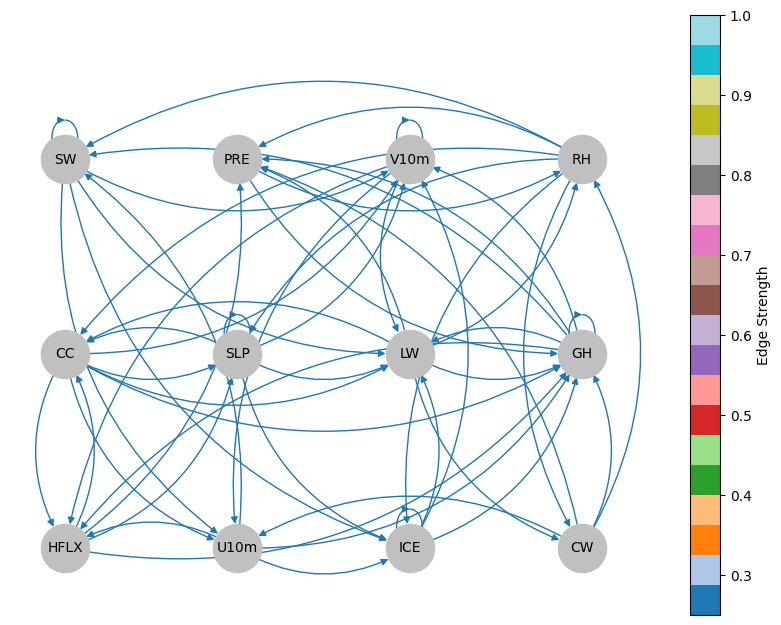

In [32]:
import matplotlib.pyplot as plt # new
import matplotlib as mpl

plt.figure(figsize=(8, 6))
nx.draw(G_2d_s1, pos_2d_s1,  edge_cmap= plt.cm.tab20,  #cmap = plt.get_cmap('jet'),
        font_size=10, node_size=1200, node_color='#c0c0c0', #[30,30,30,30,30],
        edge_color=weights_2d_s1, with_labels = True, connectionstyle='arc3, rad = 0.3')
#nx.draw_networkx(G, with_labels = True)
plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0.25, 1), cmap=plt.cm.tab20),
              orientation='vertical', label='Edge Strength')
plt.show()

In [33]:
pred_graph_s1

array([[0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.],
       [1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.],
       [1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.],
       [0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.]])

In [38]:
true_graph

array([[0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.]])

In [39]:
cdt.metrics.SHD(true_graph, pred_graph_s1)

61.0

In [40]:
true_values = true_graph
predictions = pred_graph_s1

N = true_values.shape[1]*true_values.shape[0]
accuracy = (true_values == predictions).sum() / N
TP = ((predictions == 1) & (true_values == 1)).sum()
FP = ((predictions == 1) & (true_values == 0)).sum()
TN = ((predictions == 0) & (true_values == 0)).sum()
FN = ((predictions == 0) & (true_values == 1)).sum()
precision = TP / (TP+FP)
recall = TP / (TP + FN)
FDR = FP / (FP + TP)
F1 = 2 * (precision * recall) / (precision + recall)
print('Accuracy: {}, Precision: {}, Recall: {}, FDR: {}, F1 Score: {}'.format(accuracy, precision, recall, FDR,F1))

Accuracy: 0.5763888888888888, Precision: 0.36363636363636365, Recall: 0.43478260869565216, FDR: 0.6363636363636364, F1 Score: 0.396039603960396
